# <font size="5"><center>**TP1 Organización de Datos - Cátedra Collinet**</center></font>

**Alumnos**:
- Elián Daniel Foppiano
- Felipe de Luca Andrea
 
**Correctora:** Sofía Morseletto

[**Consigna**](https://github.com/orga-de-datos/practicas/blob/master/tps/2021-2c-tp/2021-2c-tp-parte1.md)

# Bibliotecas utilizadas

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import requests
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import math
from datetime import date
from os.path import exists
from IPython.display import display_html
import random
sns.set()
pd.set_option('display.max_columns', 25)

In [5]:
if not exists("datasets/df_features.csv"):
    with requests.get(
        "https://docs.google.com/spreadsheets/d/1wduqo5WyYmCpaGnE81sLNGU0VSodIekMfpmEwU0fGqs/export?format=csv"
    ) as r, open("datasets/df_features.csv", "wb") as f:
        for chunk in r.iter_content():
            f.write(chunk)

if not exists("datasets/df_target.csv"):
    with requests.get(
        "https://docs.google.com/spreadsheets/d/1gvZ03uAL6THwd04Y98GtIj6SeAHiKyQY5UisuuyFSUs/export?format=csv"
    ) as r, open("datasets/df_target.csv", "wb") as f:
        for chunk in r.iter_content():
            f.write(chunk)

df_target = pd.read_csv("datasets/df_target.csv", low_memory=False)
df_features = pd.read_csv("datasets/df_features.csv", low_memory = False)
df = df_features.merge(df_target, on = 'id')
df.set_index("id", inplace=True)

df.rename(columns={"velocidad_viendo_tarde": "velocidad_viento_tarde",
          "velocidad_viendo_temprano": "velocidad_viento_temprano"}, inplace=True)
df_original = df.copy()
df.head()

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viento_tarde,velocidad_viento_temprano,llovieron_hamburguesas_al_dia_siguiente
id,,,,,,,,,,,,,,,,,,,,,,,
86942,Retiro,2016-10-11,Este,Nornoreste,10.7,59.0,56.0,no,16.0,0.0,3.0,1.0,1009.9,1010.2,Estesureste,33.0,29.2,16.8,24.1,25.3,19.0,4.0,no
102098,Vélez Sársfield,2016-03-28,Sur,suroeste,0.0,49.0,83.0,no,2.6,0.0,8.0,7.0,1020.4,1021.4,Sur,31.0,16.9,10.6,16.4,12.3,13.0,7.0,no
67154,Palermo,2017-05-11,Sursureste,Norte,4.3,59.0,83.0,no,2.4,0.0,7.0,7.0,1024.8,1026.5,Norte,26.0,16.6,4.4,15.7,9.4,9.0,13.0,no
50245,Mataderos,2012-05-07,suroeste,Sur,NaN,67.0,93.0,no,NaN,0.0,NaN,NaN,1017.0,1020.0,Oestesuroeste,13.0,11.4,0.8,11.1,4.0,6.0,6.0,no
82904,Recoleta,2014-06-19,Nornoreste,Nornoreste,0.8,94.0,97.0,no,0.8,0.0,NaN,NaN,1016.1,1021.9,Nornoreste,33.0,11.6,6.7,11.2,8.8,11.0,15.0,no


# Colores utilizados

In [8]:
sns.color_palette("tab20")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

In [7]:
colores = sns.color_palette("tab20")
pares_colores = {
    "azul": colores[0:2],
    "naranja": colores[2:4],
    "verde": colores[4:6],
    "rojo": colores[6:8],
    "violeta": colores[8:10],
    "marron": colores[10:12],
    "rosa": colores[12:14],
    "gris": colores[14:16],
    "amarillo": colores[16:18],
    "celeste": colores[18:20]
}

paleta = {
    "temperatura": {
        "elementos": ["temp_min","temp_max","temperatura_tarde","temperatura_temprano"],
        "par_colores": pares_colores["naranja"]
    },
    "humedad": {
        "elementos": ["humedad_tarde", "humedad_temprano"],
        "par_colores": pares_colores["verde"]
    },
    "presion_atmosferica": {
        "elementos": ["presion_atmosferica_tarde", "presion_atmosferica_temprano"],
        "par_colores": pares_colores["violeta"]
    },
    "viento": {
        "elementos": ["direccion_viento_temprano", "direccion_viento_tarde", "velocidad_viento_tarde", "velocidad_viento_temprano"],
        "par_colores": pares_colores["rojo"]
    },
    "viento_rafaga_max": {
        "elementos": ["rafaga_viento_max_direccion", "rafaga_viento_max_velocidad"],
        "par_colores": pares_colores["rosa"]
    },
    "nubosidad": {
        "elementos": ["nubosidad_tarde", "nubosidad_temprano"],
        "par_colores": pares_colores["azul"]
    },
    "lluvia": {
        "elementos" : ["mm_evaporados_agua", "mm_lluvia_dia"],
        "par_colores" : pares_colores["celeste"]
    },
    "dia": {
        "elementos" : ["dia"],
        "par_colores" : pares_colores["gris"]
    },
    "barrio": {
        "elementos": ["barrio"],
        "par_colores": pares_colores["amarillo"]
    },
    "horas_de_sol": {
        "elementos": ["horas_de_sol"],
        "par_colores": pares_colores["marron"]
    }
}

def get_par_colores(feature):
    for categoria in paleta:
        if feature in paleta[categoria]["elementos"]:
            return paleta[categoria]["par_colores"]

# ¿Cómo son los datos a analizar? ¿Hay filas mal cargadas?

El primer paso para analizar el dataframe, fue observar los tipos de dato de cada columna, detectar filas con errores al cargar los datos, y determinar la forma en que dichas filas serían tratadas.

Se encontraron filas con datos mal cargados en las columnas ***presion_atmosferica_tarde***, ***nubosidad_temprano*** y ***nubosidad_tarde***. En total, eran 5 filas, y decidimos simplemente dropearlas, ya que eran muy pocas, y un tratamiento sofisticado para corregir los datos no valdría el esfuerzo.

In [15]:
df.replace({'llovieron_hamburguesas_hoy': {"si": 1, "no": 0},
           'llovieron_hamburguesas_al_dia_siguiente': {"si": 1, "no": 0 }},
           inplace = True)
df.llovieron_hamburguesas_al_dia_siguiente.astype(np.float64, copy=False)
df.llovieron_hamburguesas_hoy.astype(np.float64, copy=False)

df = df.astype({
    "barrio": "category",
    "direccion_viento_tarde": "category",
    "direccion_viento_temprano": "category",
    "rafaga_viento_max_direccion": "category"
})

df.dia = pd.to_datetime(df.dia)

def f(row):
    try:
        float(row['presion_atmosferica_tarde'])
    except:
        indices_con_error.append(row.name)

df = df.astype({'presion_atmosferica_tarde' : str})
indices_con_error = []
df.apply(f, axis=1)
df.drop(indices_con_error, inplace=True, errors="ignore")
df['presion_atmosferica_tarde'] = df['presion_atmosferica_tarde'].astype(np.float64)

df.drop(labels=df[df.nubosidad_temprano == 9].index, inplace=True)
df.drop(labels=df[df.nubosidad_tarde == 9].index, inplace=True)

In [16]:
df.dtypes.to_frame("Tipo de dato")

,Tipo de dato
barrio,category
dia,datetime64[ns]
direccion_viento_tarde,category
direccion_viento_temprano,category
horas_de_sol,float64
humedad_tarde,float64
humedad_temprano,float64
llovieron_hamburguesas_hoy,float64
mm_evaporados_agua,float64
mm_lluvia_dia,float64


# ¿Cómo se distribuyen los missings? ¿Están relacionados? ¿Podemos dropear filas?

Observamos que los datos faltantes estaban representados como NaN. Luego, graficamos el porcentaje de missings por cada feature

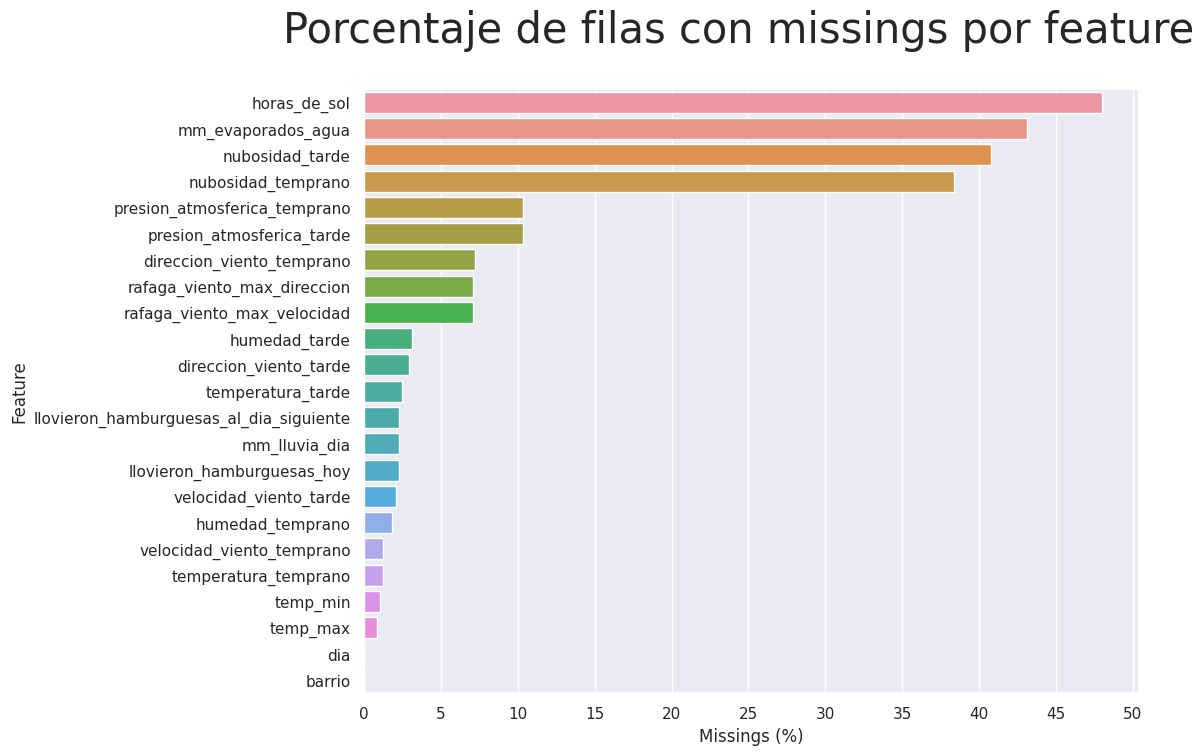

In [17]:
def plot_missings(dataframe):
    fig, ax = plt.subplots(figsize=(10,8), dpi = 100)
    fig.suptitle("Porcentaje de filas con missings por feature", fontsize=30)
    
    sns.barplot(
        data=(dataframe.isna().mean() * 100)
            .sort_values(ascending=False)
            .to_frame("Missings (%)")
            .reset_index()
            .rename(columns={"index": "Feature"}),
        x="Missings (%)",
        y="Feature",
        ax=ax
    )
    ax.set_xticks(range(0, 55,5))
    ax.set_xlabel("Missings (%)")
    ax.set_ylabel("Feature")
    plt.show()
    
plot_missings(df)

Descubrimos que, para categorías relacionadas, la cantidad de missings es similar, excepto en algunos casos.

Encontramos que, en muchos casos, los missings presentan un patrón de Missing At Random, tal y como se ve en el siguiente gráfico, a modo de ejemplo

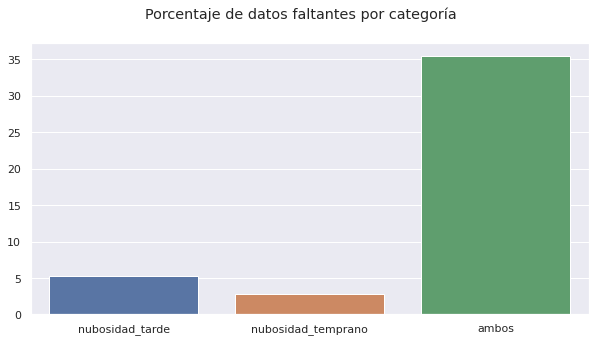

In [32]:
def mostrar_relacion_faltantes(ax, feature1, feature2):
    faltan_en_uno = df[feature1].isna().mean() * 100
    faltan_en_otro = df[feature2].isna().mean() * 100
    faltan_en_ambos = (df[feature1].isna() & df[feature2].isna()).mean() * 100
    y = [faltan_en_uno - faltan_en_ambos, faltan_en_otro - faltan_en_ambos, faltan_en_ambos]
    x = [feature1, feature2, "ambos"]
    sns.barplot(
        ax=ax,
        x=x,
        y=y,
    )

fig, ax = plt.subplots(figsize=(10,5))
mostrar_relacion_faltantes(ax, "nubosidad_tarde", "nubosidad_temprano")
    
fig.suptitle("Porcentaje de datos faltantes por categoría")
plt.show()

Lamentablemente, esta relación dificulta muchísimo la posibilidad de salvar los missings de una feature con los datos de la otra.

Por otro lado, no encontramos alguna relación entre los missings y el valor de la variable target.

En cuanto a la posibilidad de dropear filas con missings, se analizó, pero preferimos mantener todas las filas, y trabajar cada análisis de forma particular, siempre teniendo en cuenta aquellas features en las cuales el porcentaje de missings es elevado, para no llegar a conclusiones erróneas.

# ¿Cómo se distribuyen los valores de la variable target?

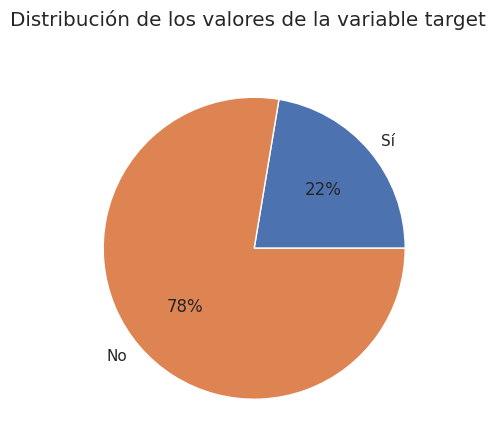

In [38]:
distribucion_target = df.llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True)
llovio_al_dia_siguiente = distribucion_target.loc[1]
no_llovio_al_dia_siguiente = distribucion_target.loc[0]

fig, ax = plt.subplots(dpi=100, figsize=(5,5))
fig.suptitle("Distribución de los valores de la variable target")
ax.pie(
    [llovio_al_dia_siguiente, no_llovio_al_dia_siguiente],
    labels=["Sí", "No"],
    autopct='%1.0f%%',
)
plt.show()

Vemos claramente que los valores no están distribuidos de manera uniforme. Esto tiene sentido ya que, en Argentina, la cantidad de días con lluvia es mucho menor a la cantidad de días sin lluvia.

Este análisis resultará sumamente útil al definir la función baseline, ya que nos indica un piso de accuracy mínimo que deberá cumplir. Este valor es de 78%, y correspondería a una baseline que devuelva 'no' de manera incondicional. Toda baseline con accuracy inferior a este valor, será mala.

# ¿Cómo se distribuyen los valores de las variables?

Las features presentaron una distribución razonable en la mayoría de los casos, con pocos outliers.

Las excepciones fueron para las variables ***mm_evaporados_agua*** y ***mm_lluvia_dia***, en las cuales observamos una gran cantidad de outliers

fig, axs = plt.subplots(1,2,figsize=(15,5), sharex=True, sharey=True)

sns.boxplot(y = df.mm_evaporados_agua, ax = axs[0], color = get_par_colores("mm_evaporados_agua")[0])
sns.boxplot(y = df.mm_lluvia_dia, ax = axs[1], color = get_par_colores("mm_lluvia_dia")[0])
axs[0].set_ylim(0, 53.4)
axs[1].set_ylim(0, 53.4)

fig.suptitle("Distribución de los datos de las variables mm_evaporados_agua y mm_lluvia_dia")
plt.show()

Sin embargo, esto no quiere decir que los datos están mal cargados. Por el contrario, tiene sentido que los días en que no llovió, ***mm_lluvia_dia*** valga 0.

Otras anomalías encontradas fueron, por ejemplo, la falta de una dirección del viento en las variables categóricas ***direccion_viento_tarde***, ***direccion_viento_temprano*** y ***rafaga_viento_max_direccion***.

# ¿Hay variables que tengan un coeficiente de correlación alto?

Un coeficiente de correlación alto indicaría que dos variables tienen dependencia lineal, lo cual podría ser una oportunidad para combinar features en el futuro, y así reducir las dimensiones del dataset. Los pares de variables con mayor correlación fueron ***temp_max*** y ***temperatura_tarde***

In [ ]:
fig, ax = plt.subplots(figsize=(5,8))
fig.set_dpi(75)
sns.scatterplot(
    x="temp_max",
    y="temperatura_tarde",
    ax=ax,
    color=paleta["temperatura"]["par_colores"][0],
    data=df.sample(10000, random_state=0),
    size=1,
    legend=False
)

plt.tight_layout()
plt.show()

# ¿Están relacionadas las variables mm_lluvia_dia y llovieron_hamburguesas_hoy?

Sospechamos que dichas variables probablemente estén relacionadas. Luego de analizar los datos vimos que, efectivamente, existe una dependencia completa de la segunda variable respecto de la primera

In [56]:
prom_lluvia_con_pocos_mm = df[df.mm_lluvia_dia <= 1].llovieron_hamburguesas_hoy.mean()
print(f"Porcentaje de casos con mm_lluvia_dia <= 1 en los que llovio hoy: {prom_lluvia_con_pocos_mm * 100}%")
prom_lluvia_con_muchos_mm = df[df.mm_lluvia_dia > 1].llovieron_hamburguesas_hoy.mean()
print(f"Porcentaje de casos con mm_lluvia_dia > 1 en los que llovio hoy: {prom_lluvia_con_muchos_mm * 100}%")

Porcentaje de casos con mm_lluvia_dia <= 1 en los que llovio hoy: 0.0%
Porcentaje de casos con mm_lluvia_dia > 1 en los que llovio hoy: 100.0%


Por lo tanto, decidimos dropear la columna, ya que no contiene información real.

In [60]:
df.drop(columns=["llovieron_hamburguesas_hoy"], inplace=True, errors="ignore")